In [57]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import optuna
import xgboost as xgb
import catboost
from catboost import CatBoostRegressor
import shap

import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


In [31]:
train_wOnlyDummiesNoDrop = pd.read_csv('~/Documents/AmesHousingML/data_cleaning/data_dummies_noDrop.csv') 
frame = train_wOnlyDummiesNoDrop.copy()
frame0 = frame.copy()
# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)



In [36]:
frame = frame[frame['SaleCondition_Normal'] == 1.0]
frame0.SaleCondition

AttributeError: 'DataFrame' object has no attribute 'SaleCondition'

In [14]:
dataset = 'dummifiedNoDrop'
model_name = 'catboost'
trial = "onlyNormalCondition"
data_process = f"{dataset}_{trial}"
        

#below is filtering out the houses that sold in normal condition

frame = frame[frame['SaleCondition_Normal'] == 1.0]

#the features will be X (independent variables)
X = frame.drop('SalePrice', axis=1)
X_array = X.values
#the target (dependent variable) will be y
y = frame['SalePrice']
y_array = y.values

# params = {'iterations': 499, 'learning_rate': 0.0875029872444346, 'depth': 5, 'loss_function': 'RMSE', 'random_seed': 42} Mean R^2: 0.9491209951386228 
params = {'iterations': 434, 'learning_rate': 0.10599212903564667, 'depth': 5, 'loss_function': 'RMSE', 'random_seed': 42}

#Input parameters into the model
best_model = CatBoostRegressor(**params)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')

def rmse_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Define the scoring function using neg_mean_squared_error
scorer = make_scorer(rmse_scorer)

# Use cross_val_score with the defined scorer
rmse_scores = cross_val_score(best_model, X, y, cv=kf, scoring=scorer)


0:	learn: 63387.5913987	total: 1.97ms	remaining: 852ms
1:	learn: 59038.7428436	total: 3.51ms	remaining: 758ms
2:	learn: 55146.8136484	total: 5.17ms	remaining: 743ms
3:	learn: 51538.8285271	total: 7ms	remaining: 753ms
4:	learn: 48206.4370746	total: 9.19ms	remaining: 789ms
5:	learn: 45188.3123980	total: 11.1ms	remaining: 790ms
6:	learn: 42687.0753543	total: 13.1ms	remaining: 800ms
7:	learn: 40323.2345785	total: 14.9ms	remaining: 793ms
8:	learn: 38160.9607223	total: 17.6ms	remaining: 833ms
9:	learn: 36245.9697482	total: 21.8ms	remaining: 926ms
10:	learn: 34619.3519759	total: 24.5ms	remaining: 944ms
11:	learn: 33125.3677865	total: 26.8ms	remaining: 942ms
12:	learn: 31725.8116289	total: 28.9ms	remaining: 935ms
13:	learn: 30352.3259741	total: 30.6ms	remaining: 919ms
14:	learn: 29162.8305331	total: 32.4ms	remaining: 905ms
15:	learn: 28064.0470120	total: 34ms	remaining: 888ms
16:	learn: 27021.2352883	total: 35.6ms	remaining: 873ms
17:	learn: 26117.2359648	total: 37.6ms	remaining: 869ms
18:	lea

In [15]:
# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores, '\n')
# Print the mean and standard deviation of the scores
print(f"Mean R^2: {cv_scores.mean()}", '\n') 

Cross-Validation Scores: [0.95320842 0.95714881 0.93511468 0.94769147 0.95343353] 

Mean R^2: 0.9493193831212242 



In [17]:
 #Split your training and testing sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict(X_test)

0:	learn: 63387.5913987	total: 2.59ms	remaining: 1.12s
1:	learn: 59236.2016427	total: 4.96ms	remaining: 1.07s
2:	learn: 55075.6381934	total: 6.46ms	remaining: 927ms
3:	learn: 51439.2489619	total: 8.17ms	remaining: 878ms
4:	learn: 48300.3017377	total: 10.3ms	remaining: 885ms
5:	learn: 45547.5103486	total: 12.1ms	remaining: 860ms
6:	learn: 43043.5575646	total: 14.3ms	remaining: 872ms
7:	learn: 40676.9349038	total: 17.1ms	remaining: 913ms
8:	learn: 38314.8355969	total: 19ms	remaining: 898ms
9:	learn: 36510.1821380	total: 21ms	remaining: 890ms
10:	learn: 34869.9384131	total: 22.9ms	remaining: 882ms
11:	learn: 33314.0137921	total: 25ms	remaining: 879ms
12:	learn: 31867.3741980	total: 26.4ms	remaining: 855ms
13:	learn: 30489.4082781	total: 27.9ms	remaining: 837ms
14:	learn: 29246.0453557	total: 29.6ms	remaining: 826ms
15:	learn: 28112.1811405	total: 31.8ms	remaining: 830ms
16:	learn: 27169.0506836	total: 33.2ms	remaining: 814ms
17:	learn: 26316.6660107	total: 34.7ms	remaining: 803ms
18:	lear

0:	learn: 63387.5913987	total: 8.61ms	remaining: 3.73s
1:	learn: 59038.7428436	total: 10.4ms	remaining: 2.24s
2:	learn: 55146.8136484	total: 11.8ms	remaining: 1.7s
3:	learn: 51538.8285271	total: 13.2ms	remaining: 1.41s
4:	learn: 48206.4370746	total: 14.5ms	remaining: 1.24s
5:	learn: 45188.3123980	total: 15.8ms	remaining: 1.13s
6:	learn: 42687.0753543	total: 17ms	remaining: 1.04s
7:	learn: 40323.2345785	total: 18.3ms	remaining: 973ms
8:	learn: 38160.9607223	total: 19.8ms	remaining: 936ms
9:	learn: 36245.9697482	total: 21.1ms	remaining: 893ms
10:	learn: 34619.3519759	total: 22.3ms	remaining: 858ms
11:	learn: 33125.3677865	total: 23.6ms	remaining: 829ms
12:	learn: 31725.8116289	total: 24.8ms	remaining: 805ms
13:	learn: 30352.3259741	total: 26.1ms	remaining: 783ms
14:	learn: 29162.8305331	total: 27.4ms	remaining: 766ms
15:	learn: 28064.0470120	total: 28.9ms	remaining: 756ms
16:	learn: 27021.2352883	total: 30.5ms	remaining: 748ms
17:	learn: 26117.2359648	total: 32ms	remaining: 739ms
18:	lea

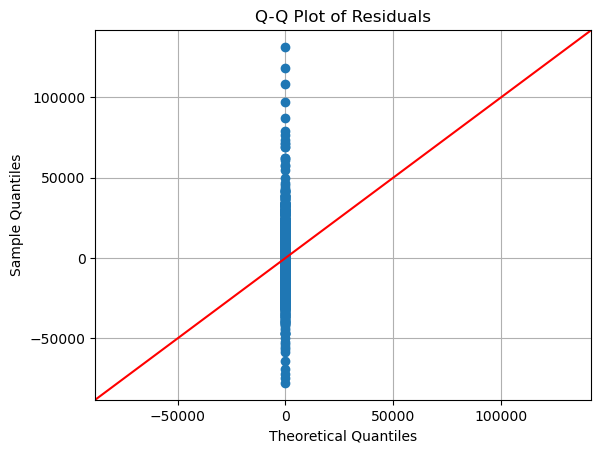

In [58]:
# Perform cross-validation and obtain predictions
predicted_values = cross_val_predict(best_model, X, y, cv=kf)

# Calculate residuals
residuals = y - predicted_values

# Create the Q-Q plot using statsmodels
sm.qqplot(residuals, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

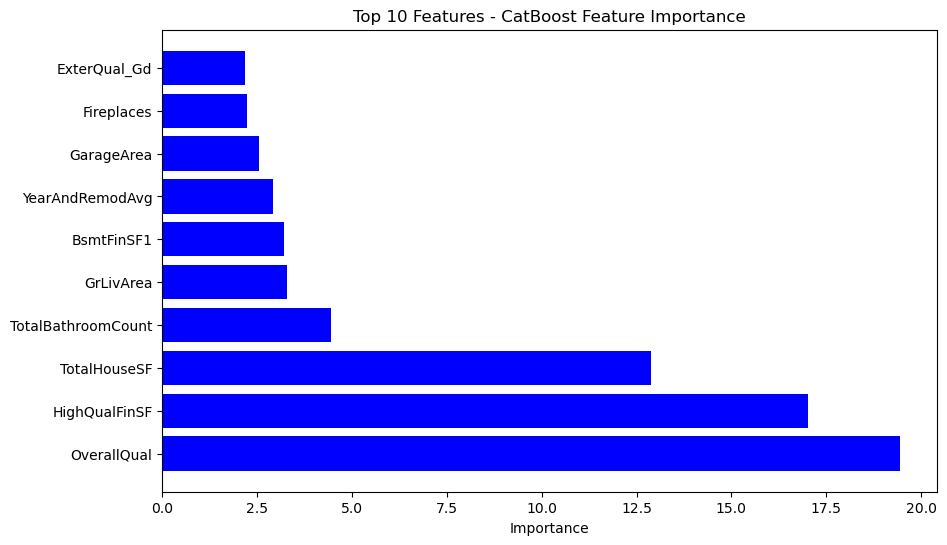

In [23]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
feature_importance = best_model.get_feature_importance()

# Get feature names from the training dataset
your_feature_names = X.columns  # Replace 'X' with your feature matrix

# Create a DataFrame for better handling
feature_importance_df = pd.DataFrame({'Feature': your_feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

# Plot feature importance for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Top 10 Features - CatBoost Feature Importance')
plt.show()

In [37]:
X

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NoAlley,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Ex,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType

In [ ]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
best_model.plot_tree(tree_idx=0, pool=None, figsize=(20, 10), show_info=['InternalValue', 'LeafCount'])


In [ ]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
best_model.plot_metric(iterations=None, metric='RMSE')


In [41]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
best_model.plot_predictions(pool=None, prediction_type='RawFormulaVal', iterations=None, aspect_ratio=0.5)


TypeError: CatBoost.plot_predictions() got an unexpected keyword argument 'pool'

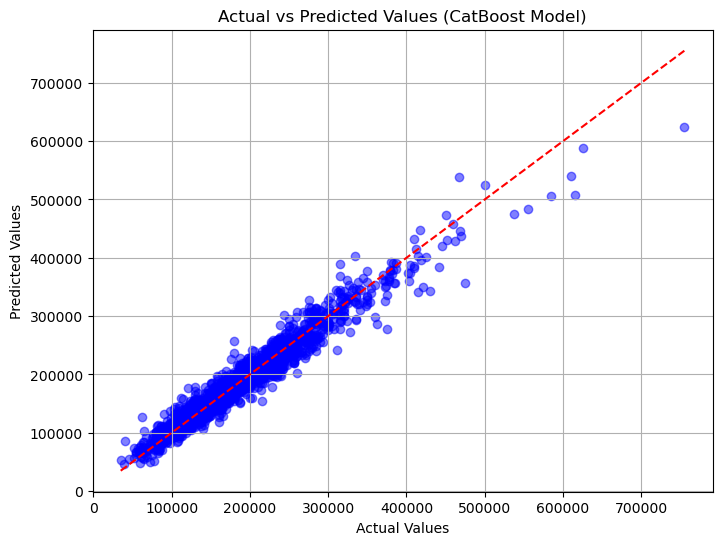

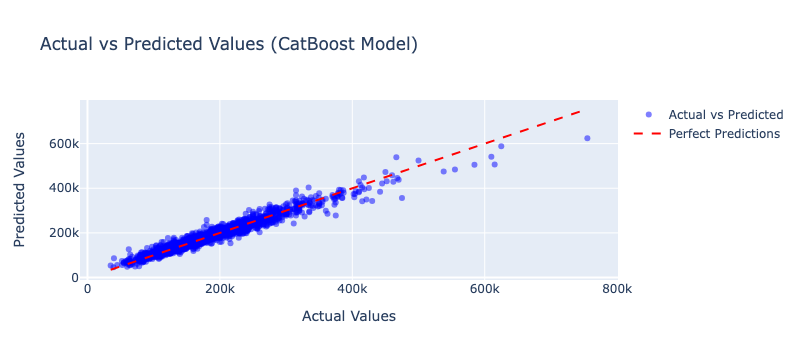

In [61]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (CatBoost Model)')
plt.grid(True)
plt.show()

# Create a scatter plot
scatter_plot = go.Scatter(x=y, y=predicted_values, mode='markers', 
                          marker=dict(color='blue', opacity=0.5),
                          name='Actual vs Predicted')

# Add a diagonal line representing perfect predictions
diagonal_line = go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)],
                           mode='lines', line=dict(color='red', dash='dash'),
                           name='Perfect Predictions')

# Layout
layout = go.Layout(title='Actual vs Predicted Values (CatBoost Model)',
                   xaxis=dict(title='Actual Values'),
                   yaxis=dict(title='Predicted Values'),
                   showlegend=True)

# Create figure
scatter_fig = go.Figure(data=[scatter_plot, diagonal_line], layout=layout)

# Show plot
scatter_fig.show()


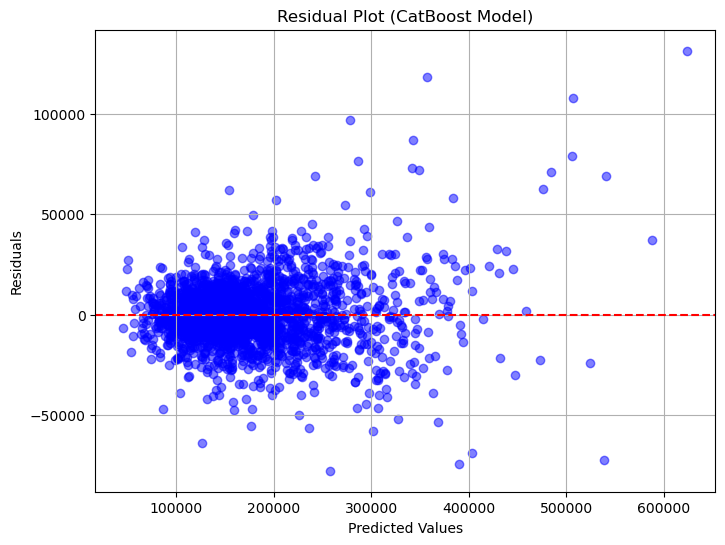

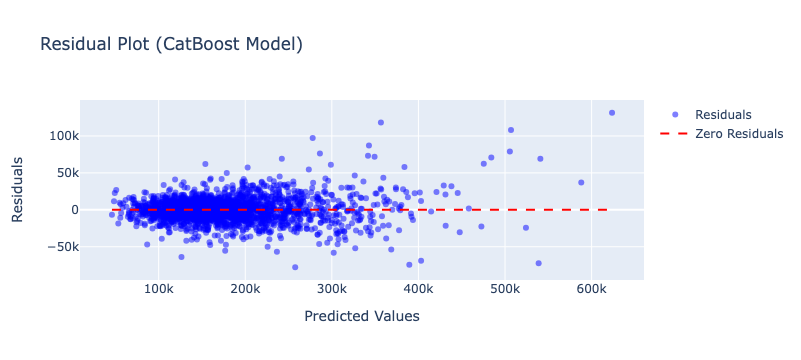

In [62]:


# Plotting residuals against predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (CatBoost Model)')
plt.grid(True)
plt.show()

# Create a scatter plot
residual_plot = go.Scatter(x=predicted_values, y=residuals, mode='markers', 
                           marker=dict(color='blue', opacity=0.5),
                           name='Residuals')

# Add a horizontal line at y=0
horizontal_line = go.Scatter(x=[min(predicted_values), max(predicted_values)], y=[0, 0],
                             mode='lines', line=dict(color='red', dash='dash'),
                             name='Zero Residuals')

# Layout
layout = go.Layout(title='Residual Plot (CatBoost Model)',
                   xaxis=dict(title='Predicted Values'),
                   yaxis=dict(title='Residuals'),
                   showlegend=True)

# Create figure
residual_fig = go.Figure(data=[residual_plot, horizontal_line], layout=layout)

# Show plot
residual_fig.show()


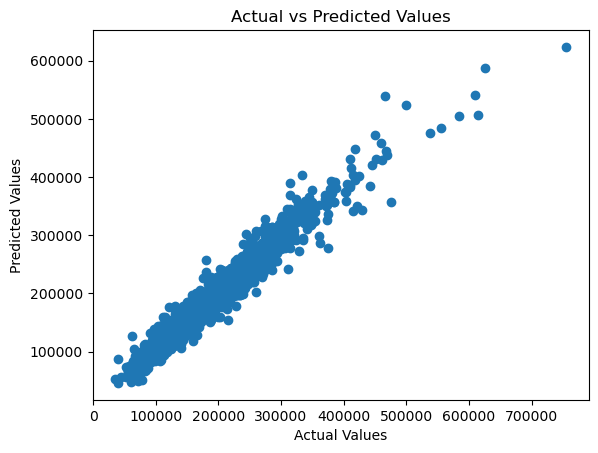

In [182]:
# Plotting actual vs predicted values
plt.scatter(y, predicted_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

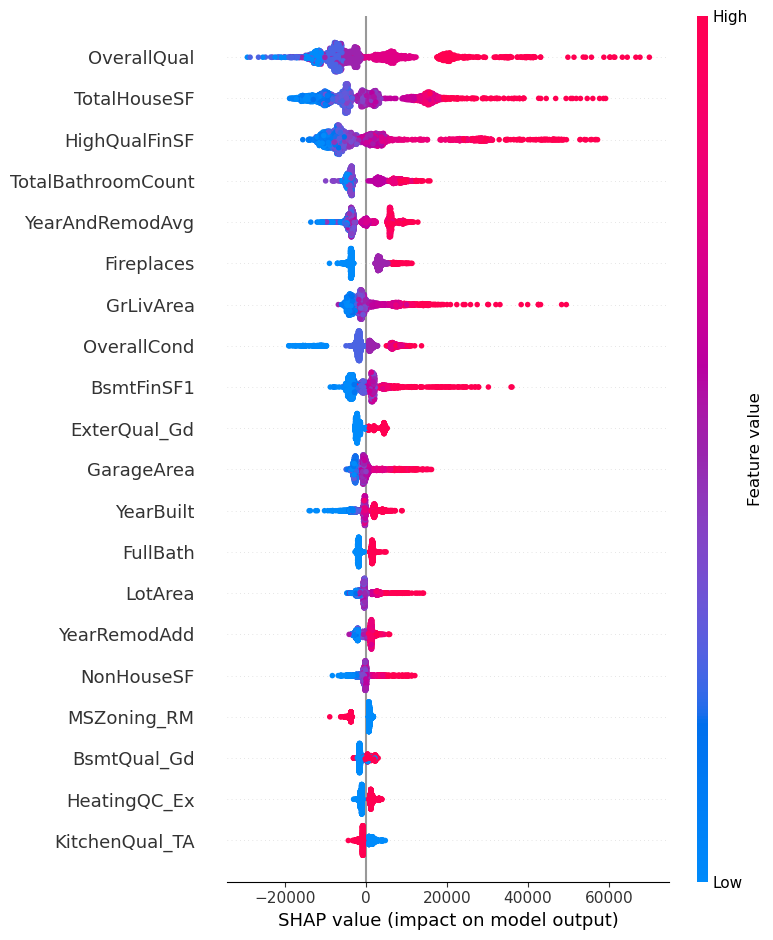

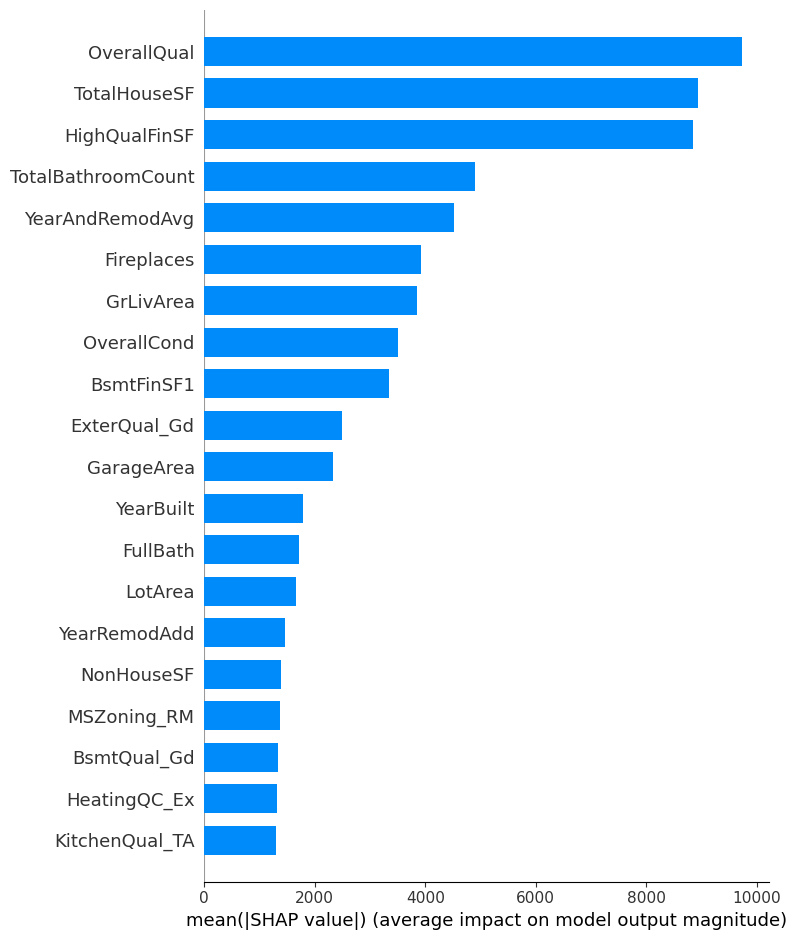

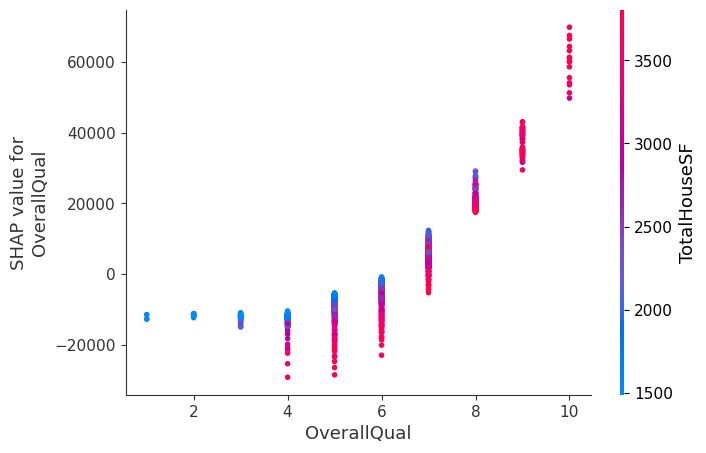

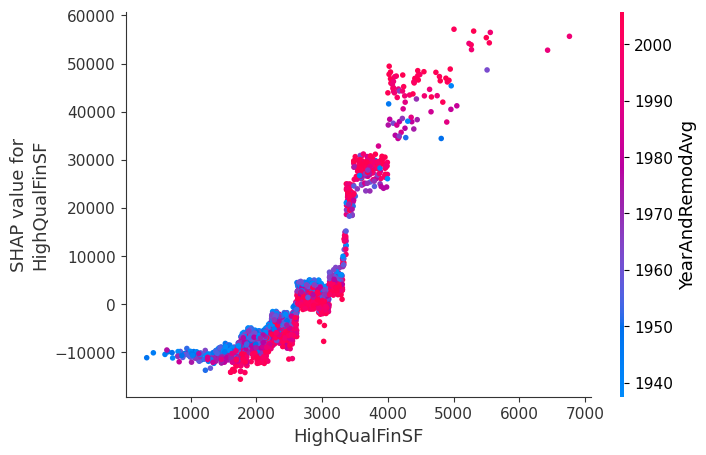

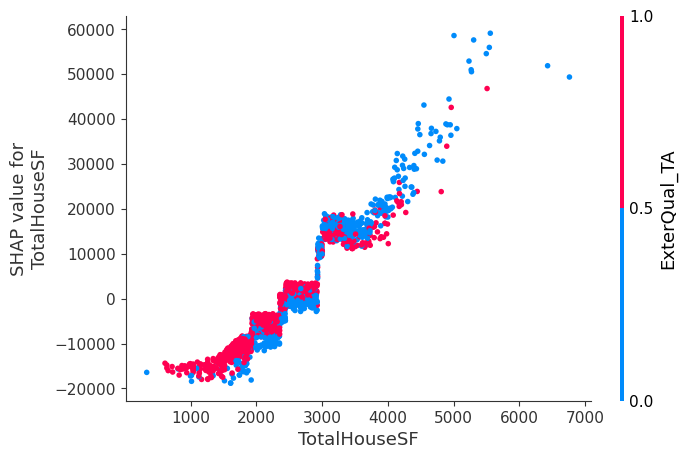

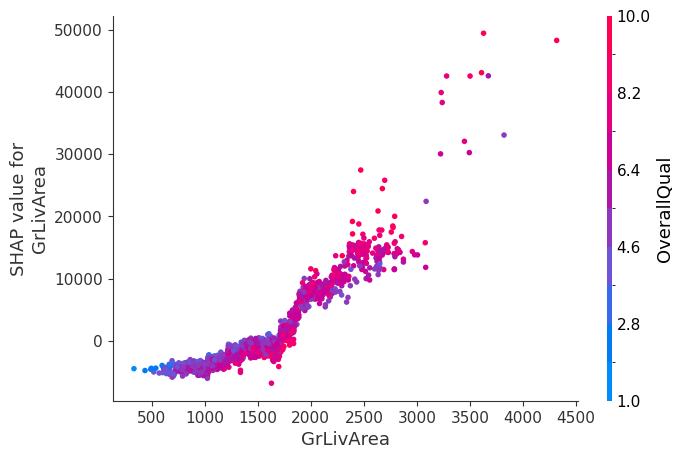

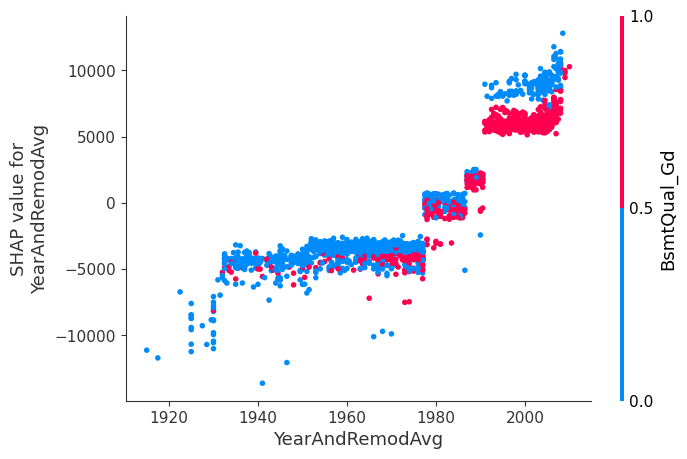

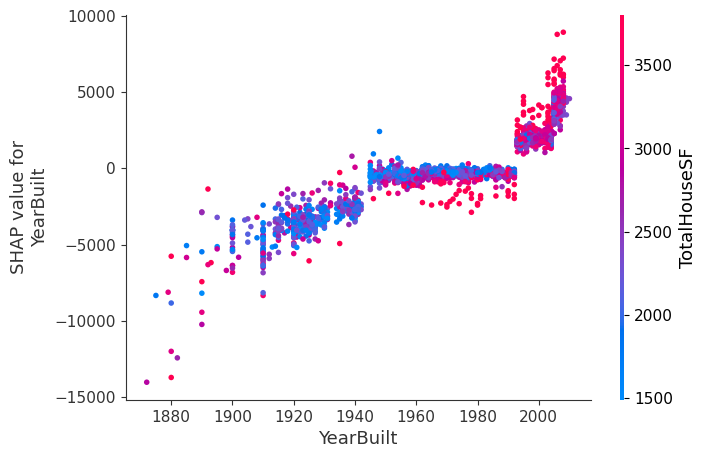

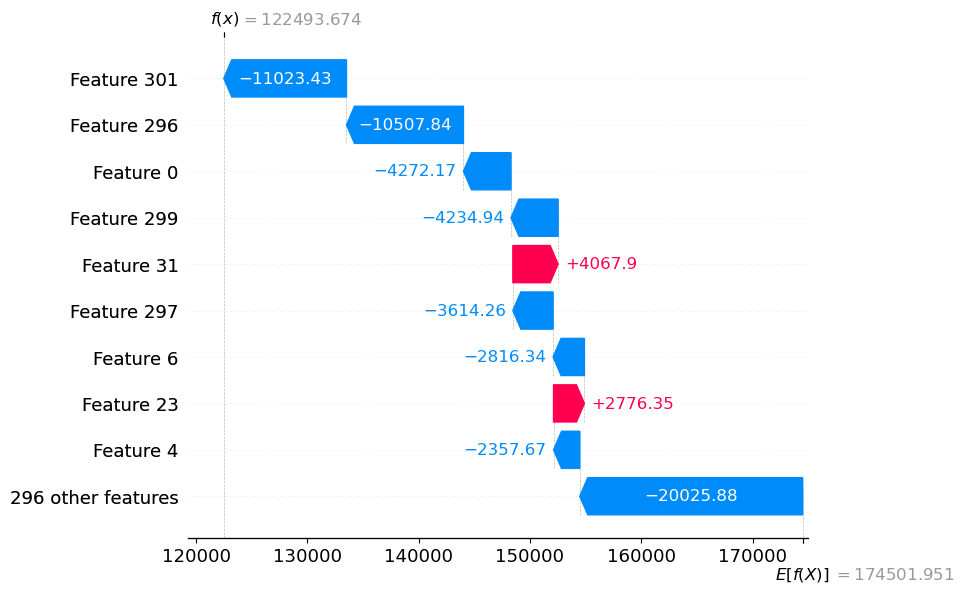

In [183]:
# Use the SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for a subset of the data (e.g., test set)
shap_values = explainer.shap_values(X)

# 1. Summary Plot
shap.summary_plot(shap_values, X)

# 2. Summary Bar Plot
shap.summary_plot(shap_values, X, plot_type="bar", show=False)

# 3. Dependence Plot
shap.dependence_plot("OverallQual", shap_values, X)
shap.dependence_plot("HighQualFinSF", shap_values, X)
shap.dependence_plot("TotalHouseSF", shap_values, X)
shap.dependence_plot("GrLivArea", shap_values, X)

#shap.dependence_plot("KitchenQual", shap_values, X_test)
shap.dependence_plot("YearAndRemodAvg", shap_values, X)
shap.dependence_plot("YearBuilt", shap_values, X)



# 4. Force Plot (for a specific prediction)
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

# 5. Waterfall Plot (for a specific prediction)
shap.waterfall_plot(shap.Explanation(values=shap_values[0, :], base_values=explainer.expected_value), max_display=10)


In [103]:
feature_names = X.columns.tolist()

# Create a DataFrame with SHAP values
shap_df = pd.DataFrame(shap_values, columns=feature_names)
shap_df.describe()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NoAlley,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Ex,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType

In [ ]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("TotalHouseSF", shap_values, X, interaction_index="LowQualFinSF", show=False)

plt.title('CatBoost Tuned, TotalHouseSF SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for TotalHouseSF', fontsize=14)
plt.xlabel('TotalHouseSF', fontsize=14);
plt.show()

In [142]:
frame.LowQualFinSF.value_counts()

0       2379
80         3
205        2
360        2
384        1
697        1
420        1
232        1
140        1
312        1
259        1
473        1
481        1
572        1
53         1
390        1
234        1
1064       1
108        1
120        1
397        1
512        1
362        1
144        1
528        1
514        1
156        1
479        1
Name: LowQualFinSF, dtype: int64

In [152]:
(frame.LowQualFinSF.value_counts().sum() - 2379) / frame.LowQualFinSF.value_counts().sum() * 100

1.2863070539419086

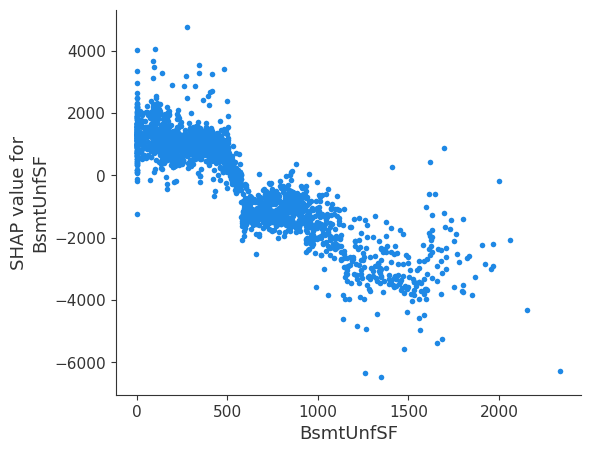

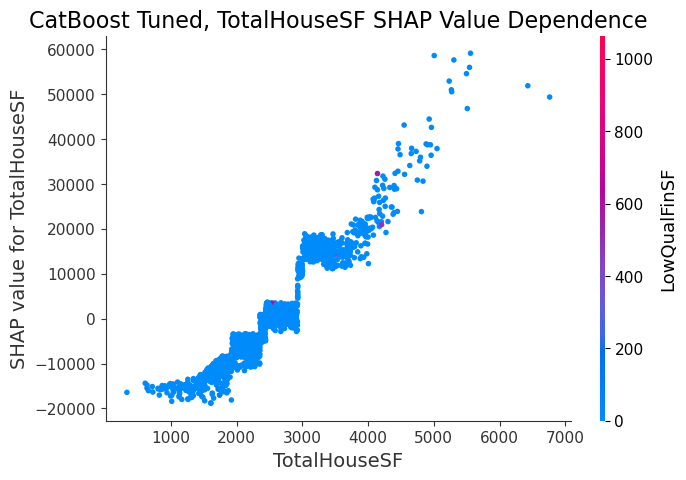

In [172]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("TotalHouseSF", shap_values, X, interaction_index="LowQualFinSF", show=False)

plt.title('CatBoost Tuned, TotalHouseSF SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for TotalHouseSF', fontsize=14)
plt.xlabel('TotalHouseSF', fontsize=14);
plt.show()

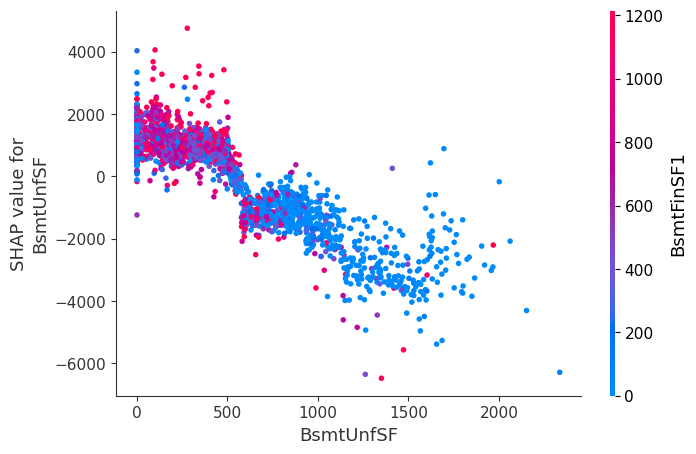

In [178]:
shap.dependence_plot("BsmtUnfSF", shap_values, X, interaction_index="BsmtFinSF1")


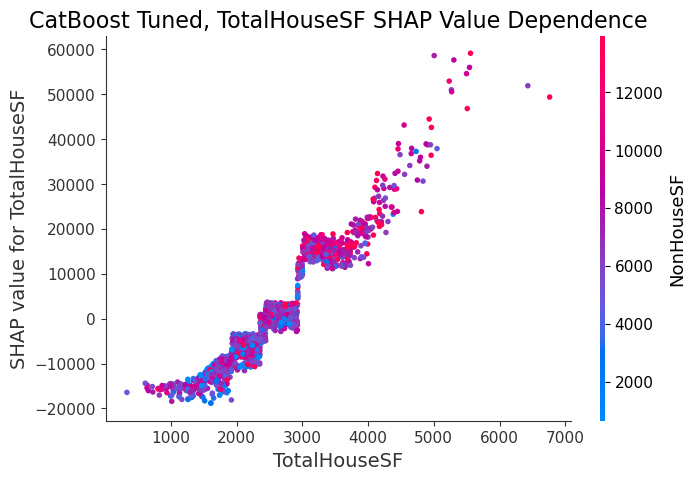

In [153]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("TotalHouseSF", shap_values, X, interaction_index="NonHouseSF", show=False)

plt.title('CatBoost Tuned, TotalHouseSF SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for TotalHouseSF', fontsize=14)
plt.xlabel('TotalHouseSF', fontsize=14);
plt.show()

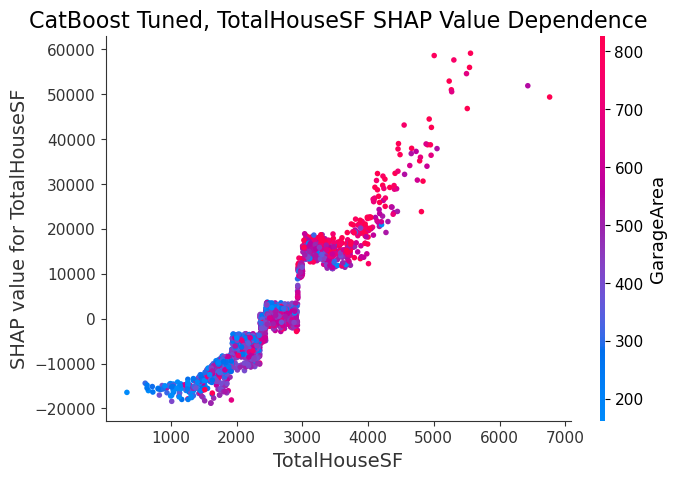

In [154]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("TotalHouseSF", shap_values, X, interaction_index="GarageArea", show=False)

plt.title('CatBoost Tuned, TotalHouseSF SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for TotalHouseSF', fontsize=14)
plt.xlabel('TotalHouseSF', fontsize=14);
plt.show()

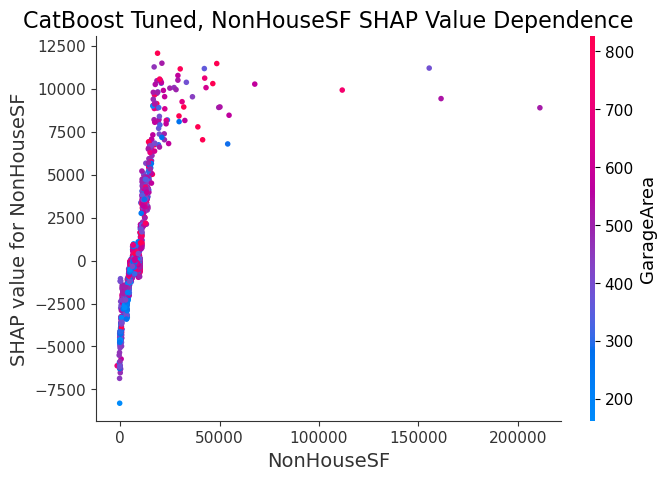

In [158]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("NonHouseSF", shap_values, X, interaction_index="GarageArea", show=False)

plt.title('CatBoost Tuned, NonHouseSF SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for NonHouseSF', fontsize=14)
plt.xlabel('NonHouseSF', fontsize=14);
plt.show()

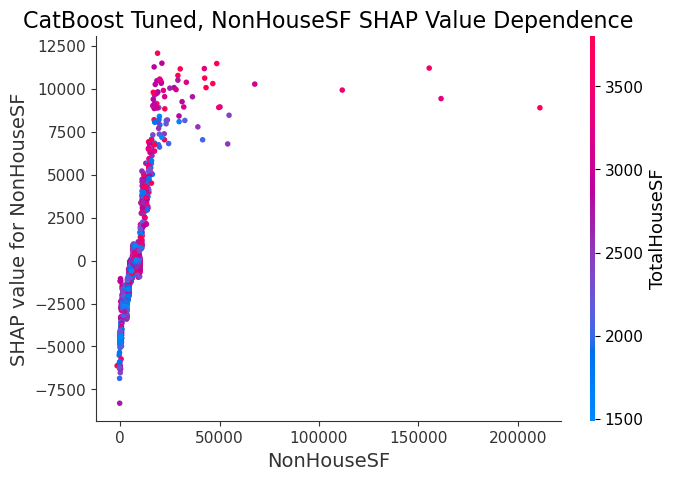

In [163]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("NonHouseSF", shap_values, X, interaction_index="TotalHouseSF", show=False)

plt.title('CatBoost Tuned, NonHouseSF SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for NonHouseSF', fontsize=14)
plt.xlabel('NonHouseSF', fontsize=14);
plt.show()

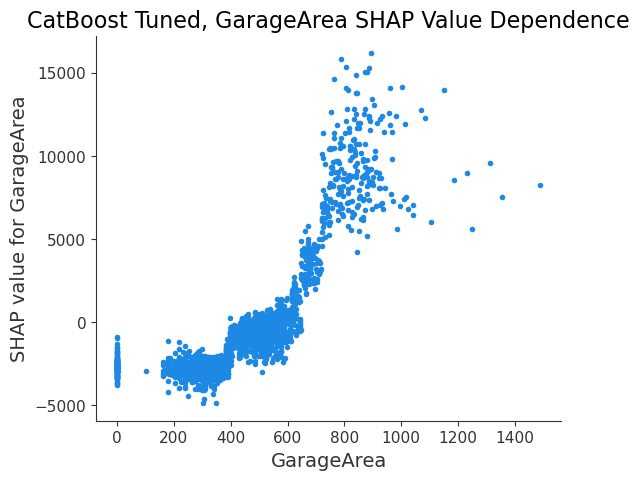

In [167]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("GarageArea", shap_values, X, interaction_index=None, show=False)

plt.title('CatBoost Tuned, GarageArea SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for GarageArea', fontsize=14)
plt.xlabel('GarageArea', fontsize=14);
plt.show()

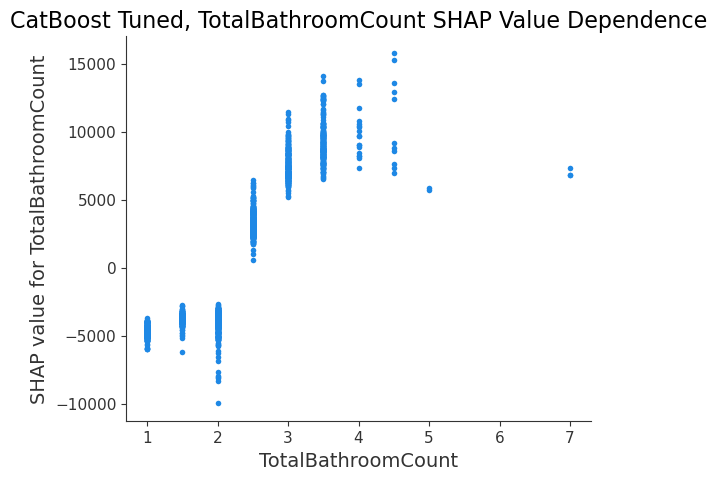

In [129]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("TotalBathroomCount", shap_values, X, interaction_index=None, show=False)

plt.title('CatBoost Tuned, TotalBathroomCount SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for TotalBathroomCount', fontsize=14)
plt.xlabel('TotalBathroomCount', fontsize=14);
plt.show()

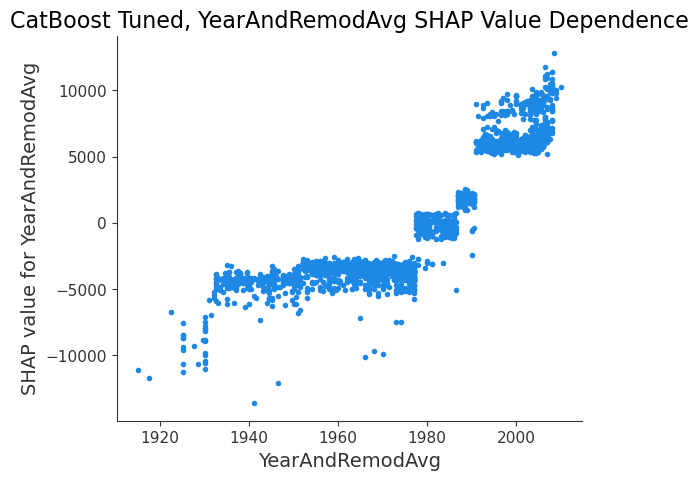

In [179]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("YearAndRemodAvg", shap_values, X, interaction_index=None, show=False)

plt.title('CatBoost Tuned, YearAndRemodAvg SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for YearAndRemodAvg', fontsize=14)
plt.xlabel('YearAndRemodAvg', fontsize=14);
plt.show()

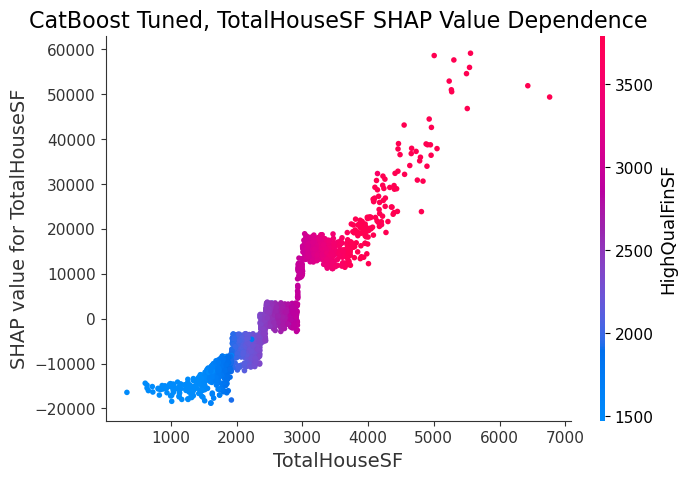

In [127]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("TotalHouseSF", shap_values, X, interaction_index='HighQualFinSF', show=False)

plt.title('CatBoost Tuned, TotalHouseSF SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for TotalHouseSF', fontsize=14)
plt.xlabel('TotalHouseSF', fontsize=14);
plt.show()

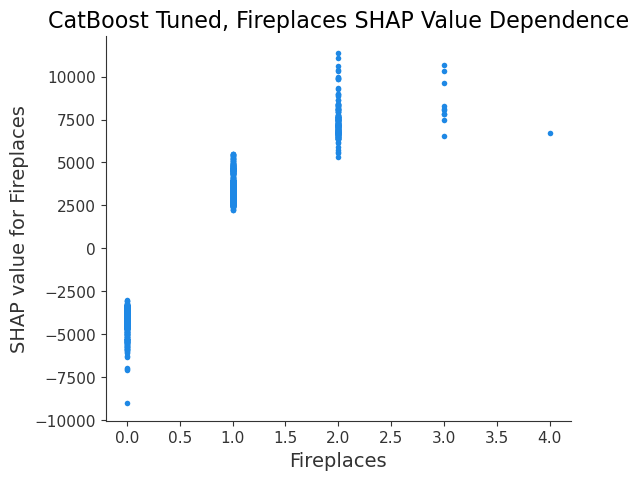

In [130]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("Fireplaces", shap_values, X, interaction_index=None, show=False)

plt.title('CatBoost Tuned, Fireplaces SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for Fireplaces', fontsize=14)
plt.xlabel('Fireplaces', fontsize=14);
plt.show()

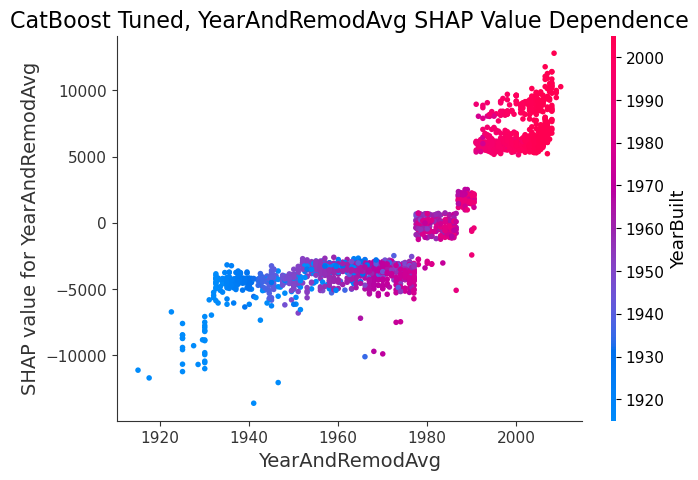

In [134]:
#YearBuilt LowQualFinSF

#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("YearAndRemodAvg", shap_values, X, interaction_index="YearBuilt", show=False)

plt.title('CatBoost Tuned, YearAndRemodAvg SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for YearAndRemodAvg', fontsize=14)
plt.xlabel('YearAndRemodAvg', fontsize=14);
plt.show()

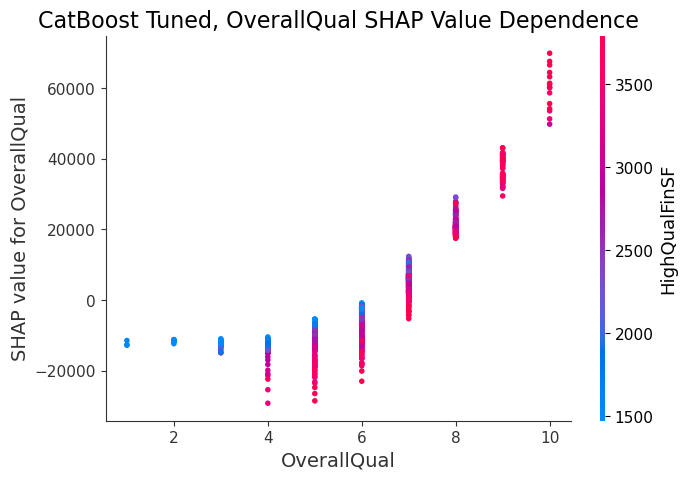

In [181]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("OverallQual", shap_values, X, interaction_index="HighQualFinSF", show=False)

plt.title('CatBoost Tuned, OverallQual SHAP Value Dependence', fontsize=16)

plt.ylabel('SHAP value for OverallQual', fontsize=14)
plt.xlabel('OverallQual', fontsize=14);
plt.show()